## Visualizations

### Preliminary

Checking IRIS DOI and ISBN

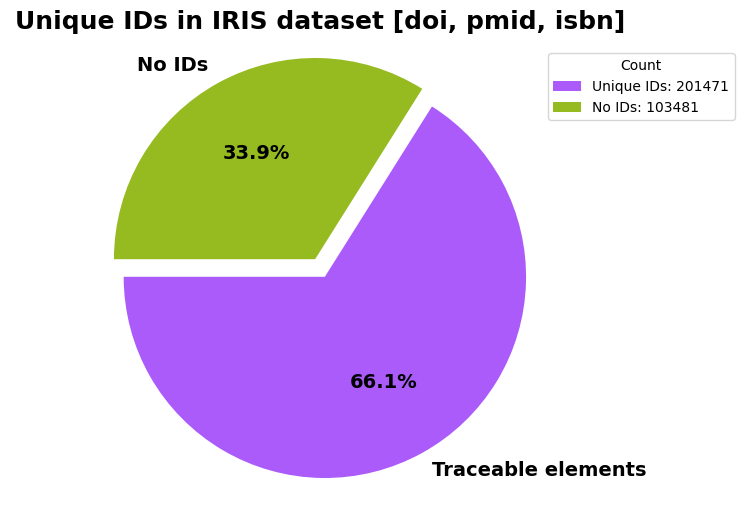

In [15]:
import matplotlib.pyplot as plt
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns
from src.read_iris import read_iris
import polars as pl


# Data
df_filtered = read_iris("data/iris-data-2024-03-14", not_filtered=False)
elements_with_dpi = len(df_filtered)
total = len(read_iris("data/iris-data-2024-03-14", not_filtered=True))

# Percentages
percent_unique_id = (elements_with_dpi / total) * 100
percent_other = 100 - percent_unique_id

# Plot
labels = ['Traceable elements', 'No IDs']
sizes = [percent_unique_id, percent_other]
colors = ['#AA5BF9', '#96BB20']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=180, 
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)  

plt.title(
    'Unique IDs in IRIS dataset [doi, pmid, isbn]', 
    fontdict={'fontsize': 18, 'fontweight': 'bold'}
)  

# Add legend
legend_labels = [f'Unique IDs: {elements_with_dpi}', f'No IDs: {total - elements_with_dpi}']
plt.legend(patches, legend_labels, loc="upper right", bbox_to_anchor=(1.18, 0.98), title="Count")

plt.axis('equal') 
plt.show()



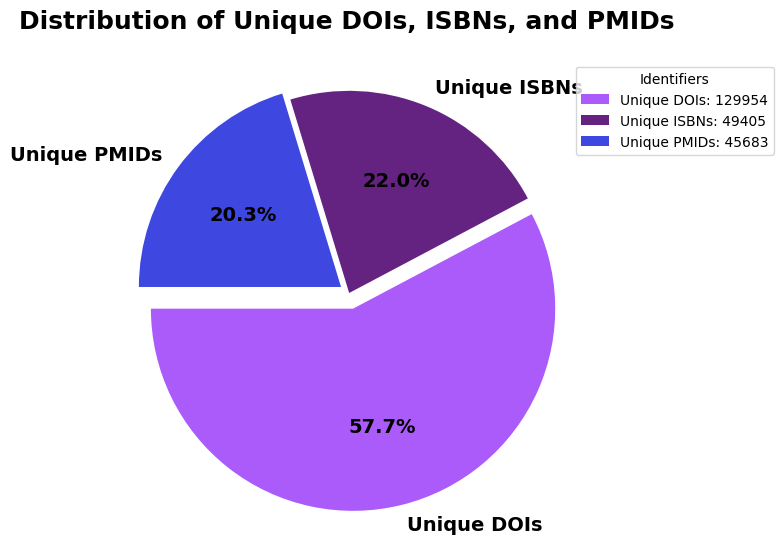

In [5]:
# QUESTO è DA ELIMINARE

import matplotlib.pyplot as plt
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns

# Data
unique_dois = 129954  # filtered_dois
unique_isbns = 49405  # filtered_isbns
unique_pmids = 45683  # filtered_pmids

total_identifiers = 304952

empty = total_identifiers - (unique_dois + unique_isbns + unique_pmids)

# Calculating percentages
percent_dois = (unique_dois / total_identifiers) * 100
percent_isbns = (unique_isbns / total_identifiers) * 100
percent_pmids = (unique_pmids / total_identifiers) * 100

# Plot
labels = ['Unique DOIs', 'Unique ISBNs', 'Unique PMIDs']
sizes = [percent_dois, percent_isbns, percent_pmids]
colors = ['#AA5BF9', '#642381', '#3E48E1']
explode = (0.08, 0, 0.05)  # explode the 1st slice (Unique DOIs)

# Custom font properties
font_properties = {'weight': 'bold', 'size': 14}

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180,
                                    textprops=font_properties)

# Customizing the title font
plt.title('Distribution of Unique DOIs, ISBNs, and PMIDs', fontdict={'weight': 'bold', 'size': 18}, pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend with specific numbers in the upper right corner
legend_labels = [f'Unique DOIs: {unique_dois}', f'Unique ISBNs: {unique_isbns}', f'Unique PMIDs: {unique_pmids}']
plt.legend(patches, legend_labels, loc="upper right", bbox_to_anchor=(1.2, 1.022), title="Identifiers")

# Show plot
plt.show()


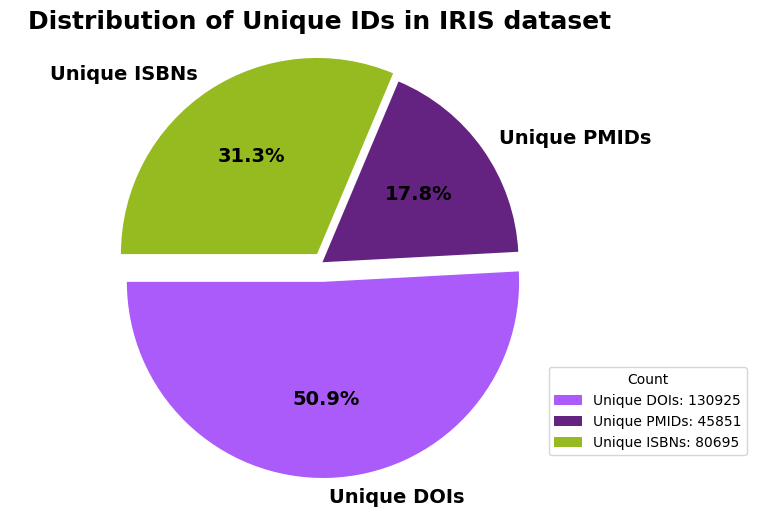

In [18]:
import polars as pl
import matplotlib.pyplot as plt
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns
from src.read_iris import read_iris


df_ids = get_iris_dois_pmids_isbns("data/iris-data-2024-03-14")

count_dois = df_ids.filter(pl.col('id').str.starts_with('doi:')).shape[0]
count_pmids = df_ids.filter(pl.col('id').str.starts_with('pmid:')).shape[0]
count_isbns = df_ids.filter(pl.col('id').str.starts_with('isbn:')).shape[0]

total_ids = df_ids.shape[0]

# Percentages
percent_dois = (count_dois / total_ids) * 100
percent_pmids = (count_pmids / total_ids) * 100
percent_isbns = (count_isbns / total_ids) * 100

# Plot
labels = ['Unique DOIs', 'Unique PMIDs', 'Unique ISBNs']
sizes = [percent_dois, percent_pmids, percent_isbns]
colors = ['#AA5BF9', '#642381', '#96BB20']
explode = (0.1, 0, 0.05) 

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=180, 
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)  

plt.title(
    'Distribution of Unique IDs in IRIS dataset', 
    fontdict={'fontsize': 18, 'fontweight': 'bold'}
)  


legend_labels = [f'Unique DOIs: {count_dois}', f'Unique PMIDs: {count_pmids}', f'Unique ISBNs: {count_isbns}']
plt.legend(patches, legend_labels, loc="upper right", bbox_to_anchor=(1.2, 0.3), title="Count")


plt.axis('equal') 
plt.show()


### RQ1

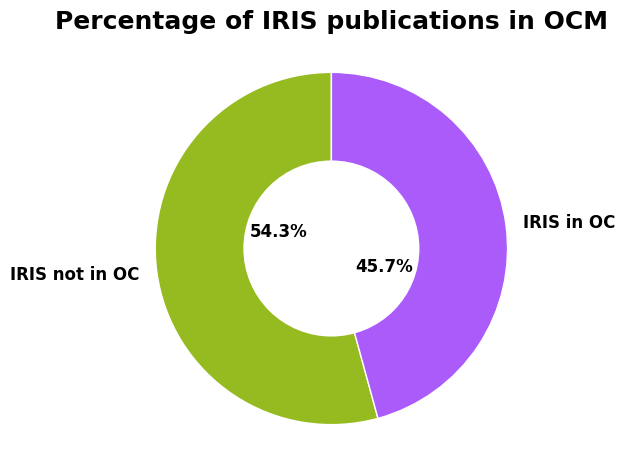

In [25]:
import matplotlib.pyplot as plt
import os
from answer_research_questions import answer_question_1
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns

result = answer_question_1()

# Data
articles_in_iris = result.item()
total_articles = len(get_iris_dois_pmids_isbns("data/iris-data-2024-03-14"))
articles_in_om = total_articles - articles_in_iris


# Percentage of articles in OM and IRIS
percentage_iris = articles_in_iris / total_articles * 100
percentage_om = articles_in_om / total_articles * 100

# Colors
colors = ['#96BB20', '#AA5BF9']  # Purple for OM, Acid Green for IRIS

# Labels
labels = ['IRIS not in OC', 'IRIS in OC']

# Custom font properties
font_properties = {'weight': 'bold', 'size': 12}
title_font_properties = {'weight': 'bold', 'size': 18}

# Creating the plot
fig, ax = plt.subplots(figsize=(5, 5))  # Adjusting figure size
pie = ax.pie([articles_in_om, articles_in_iris], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
             wedgeprops={'edgecolor': 'white'}, textprops=font_properties)

# Central circle to create the donut graph
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Moving the percentage labels
for text in pie[2]:
    text.set_horizontalalignment('center')  # Aligning text to center
    text.set_position((0, 0))  # Moving the labels towards the center and outside of the pie chart

# Moving the percentage labels vertically with a space in between
pie[2][0].set_position((-0.3, 0.1))
pie[2][1].set_position((0.3, -0.1))

# Appearance of the plot
ax.axis('equal')

plt.title('Percentage of IRIS publications in OCM', fontdict=title_font_properties, pad=20)  # Adjusting title font

# Save with improved resolution
plt.savefig('articles_distribution.png', dpi=600)  # Saving with 600 dpi resolution


# Salva con una risoluzione migliore nella stessa cartella dello script
save_path = os.path.join( 'articles_distribution.png')
plt.savefig(save_path, dpi=600)  # Saving with 600 dpi resolution

# Show the plot
plt.show()


### RQ2

NameError: name 'log_format' is not defined

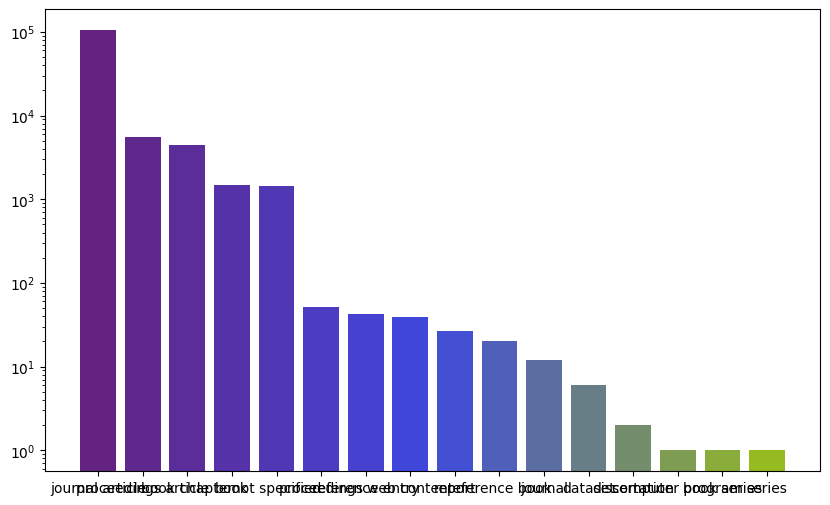

In [31]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

from answer_research_questions import answer_question_2


result_df = answer_question_2()

result = result_df.to_dict()

#  Estrai i dati dal dizionario
types = result['type']
counts = result['len']

# Sostituisci i valori vuoti nella colonna 'type' con 'not specified'
types = ['not specified' if t == 'no type' else t for t in types]


# Definisci i colori di inizio e fine della sfumatura
color_start = '#642381'
color_middle = '#3E48E1'
color_end = '#96BB20'

# Crea una mappa di colori lineare tra i colori di inizio e fine
cmap = LinearSegmentedColormap.from_list('custom_gradient', [color_start, color_middle, color_end])

# Crea il grafico a barre con scala logaritmica sull'asse y
plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color=cmap(np.linspace(0, 1, len(types))))

# Imposta l'asse y su scala logaritmica
plt.yscale('log')

# Applica il formattatore all'asse y
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))

# Imposta il titolo e le etichette degli assi
plt.title('Types of publications in IRIS')
plt.xlabel('Type')
plt.ylabel('Count')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Aggiungi i valori all'interno delle barre
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

# Imposta il layout in modo che le etichette non si sovrappongano
plt.tight_layout()

# Mostra il grafico
plt.show()


NameError: name 'log_format' is not defined

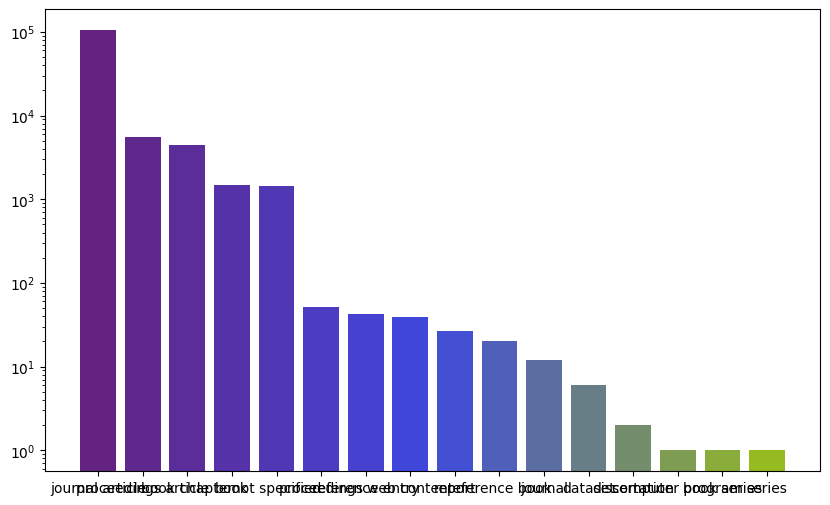

In [32]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Definisci i colori di inizio e fine della sfumatura
color_start = '#642381'
color_middle = '#3E48E1'
color_end = '#96BB20'

# Crea una mappa di colori lineare tra i colori di inizio e fine
cmap = LinearSegmentedColormap.from_list('custom_gradient', [color_start, color_middle, color_end])

# Crea il grafico a barre con scala logaritmica sull'asse y
plt.figure(figsize=(10, 6))
bars = plt.bar(types, counts, color=cmap(np.linspace(0, 1, len(types))))

# Imposta l'asse y su scala logaritmica
plt.yscale('log')

# Applica il formattatore all'asse y
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))

# Imposta il titolo e le etichette degli assi
plt.title('Types of publications in IRIS')
plt.xlabel('Type')
plt.ylabel('Count')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Aggiungi i valori all'interno delle barre
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

# Imposta il layout in modo che le etichette non si sovrappongano
plt.tight_layout()

# Mostra il grafico
plt.show()

### RQ3

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

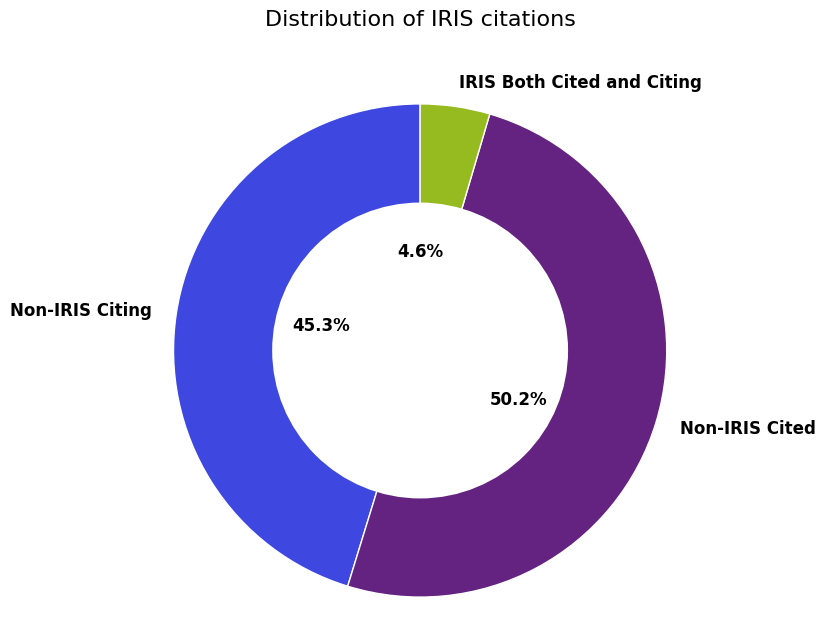

In [34]:
import matplotlib.pyplot as plt

from answer_research_questions import answer_question_3, answer_question_4, answer_question_5

# Dati
total_3 = answer_question_3()
total_4 = answer_question_4()
total_5 = answer_question_5()

citations_total = total_3.item()
citations_non_iris_cited = total_4.select('cited').item()
citations_non_iris_citing = total_4.select('citing').item()
citations_iris_both = total_5.item()

# Imposta il font globale
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12  # Dimensione del font generale
plt.rcParams['axes.titlesize'] = 16  # Dimensione del font del titolo
plt.rcParams['axes.labelsize'] = 14  # Dimensione del font delle etichette degli assi
plt.rcParams['legend.fontsize'] = 12  # Dimensione del font della legenda
plt.rcParams['xtick.labelsize'] = 12  # Dimensione del font delle etichette dell'asse x
plt.rcParams['ytick.labelsize'] = 12  # Dimensione del font delle etichette dell'asse y

# Calcolare le percentuali
percentage_non_iris_citing = citations_non_iris_citing / citations_total * 100
percentage_non_iris_cited = citations_non_iris_cited / citations_total * 100
percentage_iris_both = citations_iris_both / citations_total * 100

# Dati per il grafico
sizes = [percentage_non_iris_citing, percentage_non_iris_cited, percentage_iris_both]
labels = ['Non-IRIS Citing', 'Non-IRIS Cited', 'IRIS Both Cited and Citing']
colors = ['#3E48E1', '#642381', '#96BB20']  # Rosso, Blu, Verde

# Creazione del grafico
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'}
)

# Spostare le etichette verso il centro e regolarne la posizione
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(12)  # Regolare la dimensione del font
    autotext.set_horizontalalignment('center')  # Allineare il testo al centro
    if i == 0:
        autotext.set_position((-0.4, 0.1))  # Sposta la prima etichetta
    elif i == 1:
        autotext.set_position((0.4, -0.2))  # Sposta la seconda etichetta
    elif i == 2:
        autotext.set_position((0, 0.4))  # Sposta la terza etichetta al centro

# Creare il cerchio centrale per l'effetto ciambella
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)


# Assicurarsi che il grafico sia un cerchio
ax.axis('equal')

# Titolo del grafico
plt.title('Distribution of IRIS citations', fontsize=16, pad=40)

# Salvare il grafico
plt.savefig('citations_distribution.png', dpi=600)

# Mostrare il grafico
plt.show()


### RQ4

### RQ5